In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
target_map = {'Iris-setosa':0, 
              'Iris-versicolor':1,
              'Iris-virginica':2 }
# Use the pandas apply method to numerically encode our attrition target variable
df['Species'] = df['Species'].apply(lambda x: target_map[x])


In [6]:
df["SepalLengthCm"].max()

7.9

In [7]:
# to train Sepal width Vs Sepal Length
X_df = df.drop(["Id","Species","PetalLengthCm","PetalWidthCm"],axis=1)
# to train Petal width Vs Petal Length
#X_df = df.drop(["Id","Species","SepalLengthCm","SepalWidthCm"],axis=1)
y_df = df["Species"]
X = X_df.values
y = y_df.values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.4)

In [9]:
y_train.shape

(90,)

In [10]:
step = 0.05
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))


In [11]:
xx.shape

(68, 92)

Text(0, 0.5, 'Sepal Width')

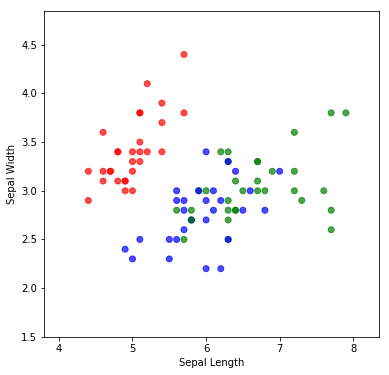

In [12]:
figure = plt.figure(figsize=(6, 6))
# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF','green'])
ax = plt.subplot()
ax.scatter(X_train[:,0],X_train[:,1], c=y_train, cmap=cm_bright, alpha=0.7)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
#ax.set_xticks(())
#ax.set_yticks(())

In [13]:
X_train.shape

(90, 2)

In [14]:
def train_model(x_train,y_train,layer_shape,optimizer):
    # layer shape is in a python list [20,20,20]
    #solver options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’
    model = MLPClassifier(hidden_layer_sizes=(layer_shape), max_iter=10000, alpha=0.000000001,
                         solver=optimizer, verbose=False,random_state=21,tol=0.000000001,learning_rate="adaptive")
    model.fit(x_train, y_train)
    return model

In [15]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


In [19]:
print(X_train.shape)
print(y_train.shape)

(90, 2)
(90,)


In [16]:
#optimizer options => solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’ for MLPClassifier and regressor
optimizer = 'adam'
clf1 = train_model(X_train,y_train,[500,],optimizer)
clf2 = train_model(X_train,y_train,[20,20,20],optimizer)
clf3 = train_model(X_train,y_train,[100,100,100],optimizer)
clf4 = train_model(X_train,y_train,[100,100],optimizer)
clf_list = [clf1,clf2,clf3,clf4]

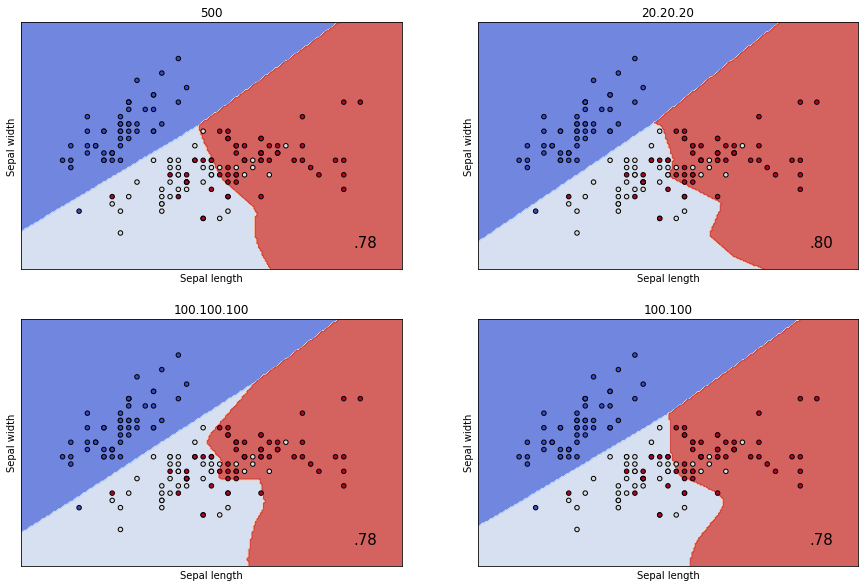

In [17]:

# Set-up 1x3 grid for plotting.
fig, sub = plt.subplots(2, 2,figsize=(15,10))
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
titles=["500","20.20.20","100.100.100","100.100"]
for clf, title, ax in zip(clf_list, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    score = clf.score(X_test, y_test)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')

plt.show()